In [1]:
import pandas as pd
import requests
import io

In [2]:
import numpy as np

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
# Google Drive file ID
file_id = '1Q2e0FsZXR_GioS063MF555u7A5fbrJ8M'
# Construct the URL for the file download
url = f'https://drive.google.com/uc?id={file_id}'

# Fetch the file using requests with streaming enabled
response = requests.get(url, stream=True)
response.raise_for_status()  # Check for request errors

# Read the content into a pandas DataFrame directly
df = pd.read_csv(response.raw)

# Display the first few rows of the DataFrame
df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,...,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,158023,/player/158023/lionel-messi/150002,15,2,2014-09-18,L. Messi,Lionel Andrés Messi Cuccittini,CF,93,95,...,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3,15+3,https://cdn.sofifa.net/players/158/023/15_120.png
1,20801,/player/20801/c-ronaldo-dos-santos-aveiro/150002,15,2,2014-09-18,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"LW, LM",92,92,...,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3,16+3,https://cdn.sofifa.net/players/020/801/15_120.png
2,9014,/player/9014/arjen-robben/150002,15,2,2014-09-18,A. Robben,Arjen Robben,"RM, LM, RW",90,90,...,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3,14+3,https://cdn.sofifa.net/players/009/014/15_120.png
3,41236,/player/41236/zlatan-ibrahimovic/150002,15,2,2014-09-18,Z. Ibrahimović,Zlatan Ibrahimović,ST,90,90,...,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3,17+3,https://cdn.sofifa.net/players/041/236/15_120.png
4,167495,/player/167495/manuel-neuer/150002,15,2,2014-09-18,M. Neuer,Manuel Peter Neuer,GK,90,90,...,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3,87+3,https://cdn.sofifa.net/players/167/495/15_120.png


In [5]:
df.columns[:40]

Index(['player_id', 'player_url', 'fifa_version', 'fifa_update',
       'fifa_update_date', 'short_name', 'long_name', 'player_positions',
       'overall', 'potential', 'value_eur', 'wage_eur', 'age', 'dob',
       'height_cm', 'weight_kg', 'league_id', 'league_name', 'league_level',
       'club_team_id', 'club_name', 'club_position', 'club_jersey_number',
       'club_loaned_from', 'club_joined_date',
       'club_contract_valid_until_year', 'nationality_id', 'nationality_name',
       'nation_team_id', 'nation_position', 'nation_jersey_number',
       'preferred_foot', 'weak_foot', 'skill_moves',
       'international_reputation', 'work_rate', 'body_type', 'real_face',
       'release_clause_eur', 'player_tags'],
      dtype='object')

In [6]:
df.shape

(161583, 110)

In [7]:
my_df = df.sample(n=24999, random_state=822, ignore_index=True)

In [8]:
my_df.shape

(24999, 110)

In [9]:
pd.set_option('display.max_columns', None)

In [10]:
my_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Columns: 110 entries, player_id to player_face_url
dtypes: float64(18), int64(45), object(47)
memory usage: 21.0+ MB


In [11]:
my_df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,205554,/player/205554/lukas-zima/200002,20,2,2019-09-19,L. Zima,Lukáš Zima,GK,67,70,700000.0,4000.0,25,1994-01-09,197,80,32.0,Serie B,2.0,1844.0,Livorno,GK,1.0,Genoa,NaN,2020.0,12,Czech Republic,NaN,NaN,NaN,Right,2,1,1,Medium/Medium,Normal (185+),No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12,15,30,14,18,17,12,22,24,44,42,34,66,36,48,65,36,79,14,23,21,19,24,23,26.0,10,13,13,70,62,64,66,65,43.0,30+2,30+2,30+2,26,28,28,28,26,27+2,27+2,27+2,27+2,27+2,27+2,27+2,27+2,26+2,27+2,27+2,27+2,26+2,25+2,27+2,27+2,27+2,25+2,66+2,https://cdn.sofifa.net/players/205/554/20_120.png
1,244274,/player/244274/adrian-semper/220002,22,2,2021-09-23,A. Šemper,Adrian Šemper,GK,74,77,4500000.0,10000.0,23,1998-01-12,194,89,31.0,Serie A,1.0,110556.0,Genoa,SUB,1.0,NaN,2021-08-12,2024.0,10,Croatia,NaN,NaN,NaN,Right,2,1,1,Medium/Medium,Normal (185+),No,8400000.0,NaN,Solid Player,NaN,NaN,NaN,NaN,NaN,NaN,14,15,12,34,9,12,12,13,31,29,30,32,31,68,22,47,31,21,51,13,28,11,9,65,15,25.0,13,12,15,74,74,63,75,75,31.0,27+2,27+2,27+2,27,29,29,29,27,32+2,32+2,32+2,28+2,32+2,32+2,32+2,28+2,23+2,28+2,28+2,28+2,23+2,23+2,23+2,23+2,23+2,23+2,73+2,https://cdn.sofifa.net/players/244/274/22_120.png
2,177649,/player/177649/rafael-da-silva-francisco/150002,15,2,2014-09-18,Rafinha,Rafael da Silva Francisco,"LM, CAM, RM",77,77,4500000.0,70000.0,30,1983-08-04,167,61,350.0,Pro League,1.0,111674.0,Al Shabab,LM,7.0,NaN,2013-07-06,2018.0,54,Brazil,NaN,NaN,NaN,Right,3,4,1,High/Medium,Lean (170-),No,NaN,#Acrobat,"Flair, Speed Dribbler (AI)",87.0,65.0,72.0,80.0,42.0,61.0,72,64,55,76,65,80,60,63,65,79,86,88,90,70,84,72,65,91,41,57,73,37,77,74,70,NaN,42,42,35,9,13,8,14,15,NaN,70,70,70,77,72,72,72,77,75,75,75,77,69,69,69,77,63,61,61,61,63,58,50,50,50,58,16,https://cdn.sofifa.net/players/177/649/15_120.png
3,199562,/player/199562/ilie-sanchez-farres/220002,22,2,2021-09-23,Ilie Sánchez,Ilie Sánchez Farrés,"CDM, CM, CB",73,73,2500000.0,7000.0,30,1990-11-21,180,75,39.0,Major League Soccer,1.0,696.0,Sporting Kansas City,RCB,6.0,NaN,2017-01-13,2021.0,45,Spain,NaN,NaN,NaN,Right,3,2,1,Medium/High,Lean (170-185),Yes,3800000.0,NaN,"Solid Player, Long Passer (AI)",50.0,47.0,67.0,69.0,68.0,78.0,53,39,68,77,38,64,51,49,74,75,51,50,72,75,70,49,83,84,76,57,72,70,52,66,69,69.0,67,68,64,6,16,16,12,11,NaN,58+2,58+2,58+2,61,61,61,61,61,65+2,65+2,65+2,64+2,70+2,70+2,70+2,64+2,68+2,72+1,72+1,72+1,68+2,67+2,70+2,70+2,70+2,67+2,19+2,https://cdn.sofifa.net/players/199/562/22_120.png
4,163804,/player/163804/julien-feret/150002,15,2,2014-09-18,J. Féret,Julien Féret,"CAM, CM",73,73,2200000.0,40000.0,31,1982-07-05,187,76,16.0,Ligue 1,1.0,210.0,Stade Mal

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

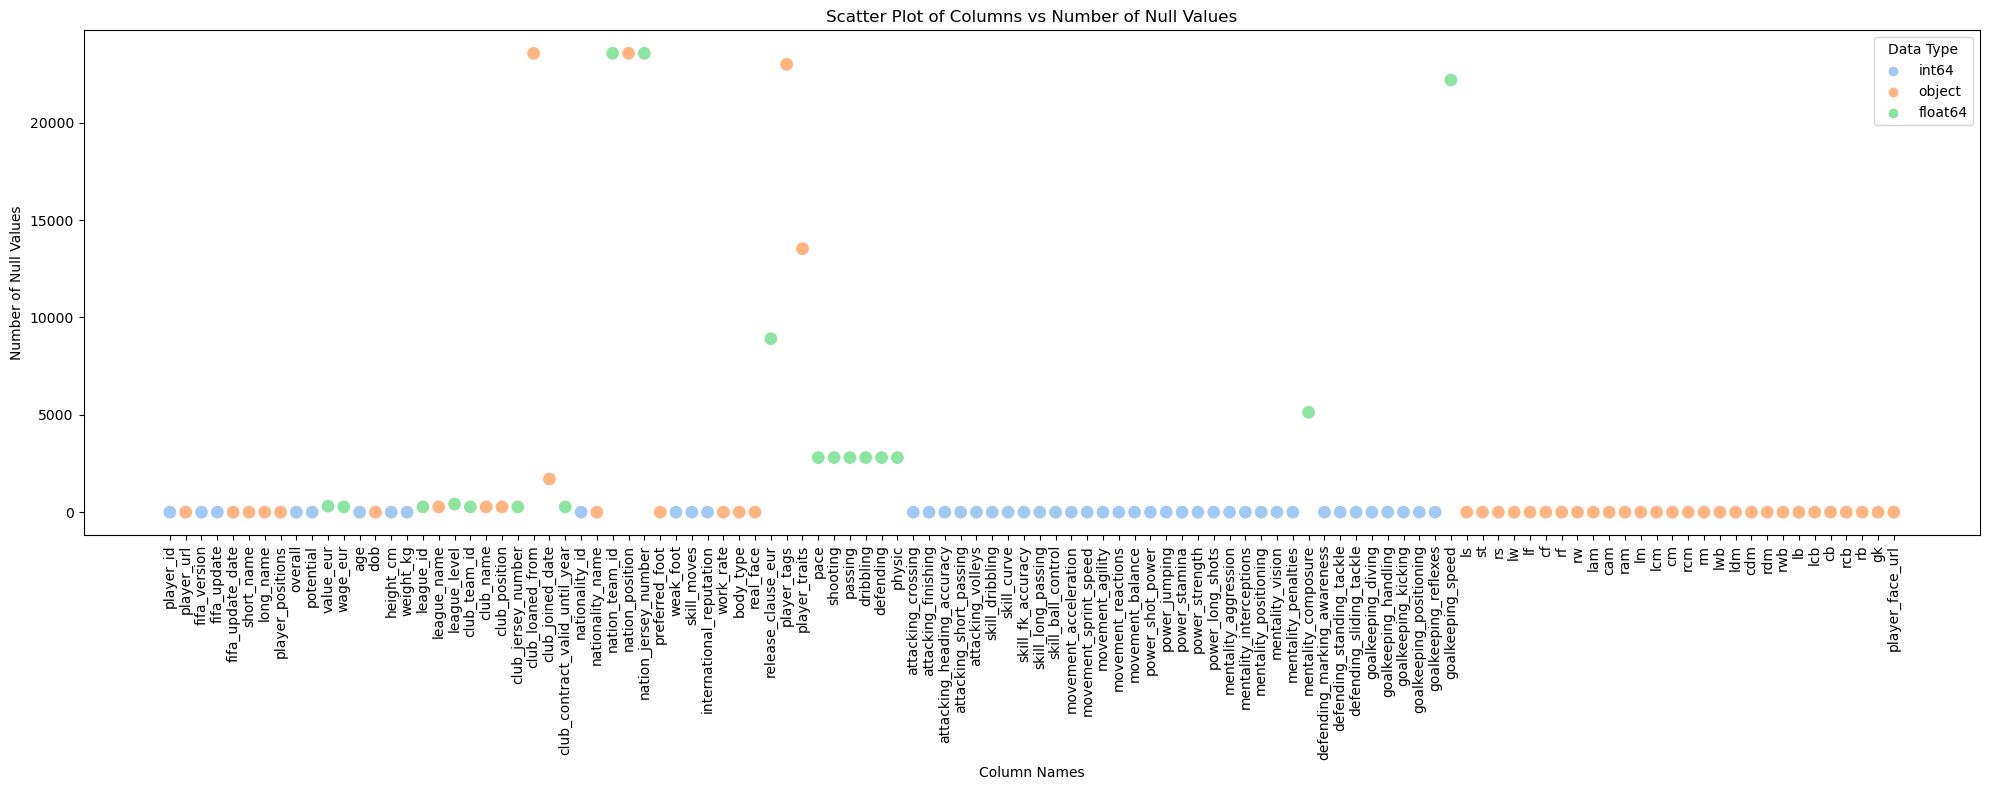

In [13]:
# Calculate number of null values
null_counts = my_df.isnull().sum()
data_types = my_df.dtypes

# Create a DataFrame for plotting
plot_data = pd.DataFrame({
    'Column': null_counts.index,
    'Null Count': null_counts.values,
    'Data Type': [data_types[col].name for col in null_counts.index]
})

# Plot
plt.figure(figsize=(20, 8))
sns.scatterplot(data=plot_data, x='Column', y='Null Count', hue='Data Type', palette='pastel', s=100)

# Customize plot
plt.xticks(rotation=90)
plt.xlabel('Column Names')
plt.ylabel('Number of Null Values')
plt.title('Scatter Plot of Columns vs Number of Null Values')
plt.legend(title='Data Type')
plt.tight_layout()

# Show plot
plt.show()

In [14]:
def convert_value(val):
    if isinstance(val, str):
        if '+' in val:
            base, boost = val.split('+')
            return int(base) + int(boost)
        elif '-' in val:
            base, boost = val.split('-')
            return int(base) - int(boost)
    return int(val)

In [15]:
columns_to_convert = [
    'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw',
    'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm',
    'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb',
    'rcb', 'rb', 'gk'
]
for col in columns_to_convert:
    my_df[col] = my_df[col].apply(convert_value)

my_df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,205554,/player/205554/lukas-zima/200002,20,2,2019-09-19,L. Zima,Lukáš Zima,GK,67,70,700000.0,4000.0,25,1994-01-09,197,80,32.0,Serie B,2.0,1844.0,Livorno,GK,1.0,Genoa,NaN,2020.0,12,Czech Republic,NaN,NaN,NaN,Right,2,1,1,Medium/Medium,Normal (185+),No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12,15,30,14,18,17,12,22,24,44,42,34,66,36,48,65,36,79,14,23,21,19,24,23,26.0,10,13,13,70,62,64,66,65,43.0,32,32,32,26,28,28,28,26,29,29,29,29,29,29,29,29,28,29,29,29,28,27,29,29,29,27,68,https://cdn.sofifa.net/players/205/554/20_120.png
1,244274,/player/244274/adrian-semper/220002,22,2,2021-09-23,A. Šemper,Adrian Šemper,GK,74,77,4500000.0,10000.0,23,1998-01-12,194,89,31.0,Serie A,1.0,110556.0,Genoa,SUB,1.0,NaN,2021-08-12,2024.0,10,Croatia,NaN,NaN,NaN,Right,2,1,1,Medium/Medium,Normal (185+),No,8400000.0,NaN,Solid Player,NaN,NaN,NaN,NaN,NaN,NaN,14,15,12,34,9,12,12,13,31,29,30,32,31,68,22,47,31,21,51,13,28,11,9,65,15,25.0,13,12,15,74,74,63,75,75,31.0,29,29,29,27,29,29,29,27,34,34,34,30,34,34,34,30,25,30,30,30,25,25,25,25,25,25,75,https://cdn.sofifa.net/players/244/274/22_120.png
2,177649,/player/177649/rafael-da-silva-francisco/150002,15,2,2014-09-18,Rafinha,Rafael da Silva Francisco,"LM, CAM, RM",77,77,4500000.0,70000.0,30,1983-08-04,167,61,350.0,Pro League,1.0,111674.0,Al Shabab,LM,7.0,NaN,2013-07-06,2018.0,54,Brazil,NaN,NaN,NaN,Right,3,4,1,High/Medium,Lean (170-),No,NaN,#Acrobat,"Flair, Speed Dribbler (AI)",87.0,65.0,72.0,80.0,42.0,61.0,72,64,55,76,65,80,60,63,65,79,86,88,90,70,84,72,65,91,41,57,73,37,77,74,70,NaN,42,42,35,9,13,8,14,15,NaN,70,70,70,77,72,72,72,77,75,75,75,77,69,69,69,77,63,61,61,61,63,58,50,50,50,58,16,https://cdn.sofifa.net/players/177/649/15_120.png
3,199562,/player/199562/ilie-sanchez-farres/220002,22,2,2021-09-23,Ilie Sánchez,Ilie Sánchez Farrés,"CDM, CM, CB",73,73,2500000.0,7000.0,30,1990-11-21,180,75,39.0,Major League Soccer,1.0,696.0,Sporting Kansas City,RCB,6.0,NaN,2017-01-13,2021.0,45,Spain,NaN,NaN,NaN,Right,3,2,1,Medium/High,Lean (170-185),Yes,3800000.0,NaN,"Solid Player, Long Passer (AI)",50.0,47.0,67.0,69.0,68.0,78.0,53,39,68,77,38,64,51,49,74,75,51,50,72,75,70,49,83,84,76,57,72,70,52,66,69,69.0,67,68,64,6,16,16,12,11,NaN,60,60,60,61,61,61,61,61,67,67,67,66,72,72,72,66,70,73,73,73,70,69,72,72,72,69,21,https://cdn.sofifa.net/players/199/562/22_120.png
4,163804,/player/163804/julien-feret/150002,15,2,2014-09-18,J. Féret,Julien Féret,"CAM, CM",73,73,2200000.0,40000.0,31,1982-07-05,187,76,16.0,Ligue 1,1.0,210.0,Stade Malherbe Caen,LCM,25.0,NaN,2014-06-16,2015.0,18,France,NaN,NaN,NaN,Right,4,3,2,Medium/Medium,Lean (185+),No,NaN,NaN,"Finesse Shot, Play

In [16]:
# For Data Manipulation
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder # For Encoding Categorical Data [Nominal | Ordinal]
from sklearn.preprocessing import OneHotEncoder # For Creating Dummy Variables of Categorical Data [Nominal]
from sklearn.impute import SimpleImputer, KNNImputer # For Imputation of Missing Data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler # For Rescaling Data
from sklearn.model_selection import train_test_split # For Splitting Data into Training & Testing Sets 


In [17]:
#my_df['player_positions'].unique()

In [18]:
merge_pos = {'LWB' : 'LW', 'RWB': 'RW', 'ST': 'CF', 'CAM': 'CM', 'CDM': 'CM'}

my_df = my_df.replace({'player_positions': merge_pos})

In [19]:
my_df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,205554,/player/205554/lukas-zima/200002,20,2,2019-09-19,L. Zima,Lukáš Zima,GK,67,70,700000.0,4000.0,25,1994-01-09,197,80,32.0,Serie B,2.0,1844.0,Livorno,GK,1.0,Genoa,NaN,2020.0,12,Czech Republic,NaN,NaN,NaN,Right,2,1,1,Medium/Medium,Normal (185+),No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12,15,30,14,18,17,12,22,24,44,42,34,66,36,48,65,36,79,14,23,21,19,24,23,26.0,10,13,13,70,62,64,66,65,43.0,32,32,32,26,28,28,28,26,29,29,29,29,29,29,29,29,28,29,29,29,28,27,29,29,29,27,68,https://cdn.sofifa.net/players/205/554/20_120.png
1,244274,/player/244274/adrian-semper/220002,22,2,2021-09-23,A. Šemper,Adrian Šemper,GK,74,77,4500000.0,10000.0,23,1998-01-12,194,89,31.0,Serie A,1.0,110556.0,Genoa,SUB,1.0,NaN,2021-08-12,2024.0,10,Croatia,NaN,NaN,NaN,Right,2,1,1,Medium/Medium,Normal (185+),No,8400000.0,NaN,Solid Player,NaN,NaN,NaN,NaN,NaN,NaN,14,15,12,34,9,12,12,13,31,29,30,32,31,68,22,47,31,21,51,13,28,11,9,65,15,25.0,13,12,15,74,74,63,75,75,31.0,29,29,29,27,29,29,29,27,34,34,34,30,34,34,34,30,25,30,30,30,25,25,25,25,25,25,75,https://cdn.sofifa.net/players/244/274/22_120.png
2,177649,/player/177649/rafael-da-silva-francisco/150002,15,2,2014-09-18,Rafinha,Rafael da Silva Francisco,"LM, CAM, RM",77,77,4500000.0,70000.0,30,1983-08-04,167,61,350.0,Pro League,1.0,111674.0,Al Shabab,LM,7.0,NaN,2013-07-06,2018.0,54,Brazil,NaN,NaN,NaN,Right,3,4,1,High/Medium,Lean (170-),No,NaN,#Acrobat,"Flair, Speed Dribbler (AI)",87.0,65.0,72.0,80.0,42.0,61.0,72,64,55,76,65,80,60,63,65,79,86,88,90,70,84,72,65,91,41,57,73,37,77,74,70,NaN,42,42,35,9,13,8,14,15,NaN,70,70,70,77,72,72,72,77,75,75,75,77,69,69,69,77,63,61,61,61,63,58,50,50,50,58,16,https://cdn.sofifa.net/players/177/649/15_120.png
3,199562,/player/199562/ilie-sanchez-farres/220002,22,2,2021-09-23,Ilie Sánchez,Ilie Sánchez Farrés,"CDM, CM, CB",73,73,2500000.0,7000.0,30,1990-11-21,180,75,39.0,Major League Soccer,1.0,696.0,Sporting Kansas City,RCB,6.0,NaN,2017-01-13,2021.0,45,Spain,NaN,NaN,NaN,Right,3,2,1,Medium/High,Lean (170-185),Yes,3800000.0,NaN,"Solid Player, Long Passer (AI)",50.0,47.0,67.0,69.0,68.0,78.0,53,39,68,77,38,64,51,49,74,75,51,50,72,75,70,49,83,84,76,57,72,70,52,66,69,69.0,67,68,64,6,16,16,12,11,NaN,60,60,60,61,61,61,61,61,67,67,67,66,72,72,72,66,70,73,73,73,70,69,72,72,72,69,21,https://cdn.sofifa.net/players/199/562/22_120.png
4,163804,/player/163804/julien-feret/150002,15,2,2014-09-18,J. Féret,Julien Féret,"CAM, CM",73,73,2200000.0,40000.0,31,1982-07-05,187,76,16.0,Ligue 1,1.0,210.0,Stade Malherbe Caen,LCM,25.0,NaN,2014-06-16,2015.0,18,France,NaN,NaN,NaN,Right,4,3,2,Medium/Medium,Lean (185+),No,NaN,NaN,"Finesse Shot, Play

In [20]:
position_mapping = {
    'GK': 'Goalkeeper',
    'CB': 'Defender',
    'RB': 'Defender',
    'LB': 'Defender',
    'RWB': 'Defender',
    'LWB': 'Defender',
    'CDM': 'Defender and Midfielder',
    'CM': 'Midfielder',
    'CAM': 'Midfielder',
    'LM': 'Midfielder',
    'RM': 'Midfielder',
    'ST': 'Forward',
    'CF': 'Forward',
    'LW': 'Forward',
    'RW': 'Forward'
}

def map_positions(positions):
    pos_list = positions.split(', ')
    mapped_positions = set()
    for pos in pos_list:
        mapped_positions.add(position_mapping.get(pos, 'Unknown'))
    return ', '.join(sorted(mapped_positions))

my_df['best_positions'] = my_df['player_positions'].apply(map_positions)

#print(my_df[['player_positions', 'best_positions']])

my_df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,best_positions
0,205554,/player/205554/lukas-zima/200002,20,2,2019-09-19,L. Zima,Lukáš Zima,GK,67,70,700000.0,4000.0,25,1994-01-09,197,80,32.0,Serie B,2.0,1844.0,Livorno,GK,1.0,Genoa,NaN,2020.0,12,Czech Republic,NaN,NaN,NaN,Right,2,1,1,Medium/Medium,Normal (185+),No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12,15,30,14,18,17,12,22,24,44,42,34,66,36,48,65,36,79,14,23,21,19,24,23,26.0,10,13,13,70,62,64,66,65,43.0,32,32,32,26,28,28,28,26,29,29,29,29,29,29,29,29,28,29,29,29,28,27,29,29,29,27,68,https://cdn.sofifa.net/players/205/554/20_120.png,Goalkeeper
1,244274,/player/244274/adrian-semper/220002,22,2,2021-09-23,A. Šemper,Adrian Šemper,GK,74,77,4500000.0,10000.0,23,1998-01-12,194,89,31.0,Serie A,1.0,110556.0,Genoa,SUB,1.0,NaN,2021-08-12,2024.0,10,Croatia,NaN,NaN,NaN,Right,2,1,1,Medium/Medium,Normal (185+),No,8400000.0,NaN,Solid Player,NaN,NaN,NaN,NaN,NaN,NaN,14,15,12,34,9,12,12,13,31,29,30,32,31,68,22,47,31,21,51,13,28,11,9,65,15,25.0,13,12,15,74,74,63,75,75,31.0,29,29,29,27,29,29,29,27,34,34,34,30,34,34,34,30,25,30,30,30,25,25,25,25,25,25,75,https://cdn.sofifa.net/players/244/274/22_120.png,Goalkeeper
2,177649,/player/177649/rafael-da-silva-francisco/150002,15,2,2014-09-18,Rafinha,Rafael da Silva Francisco,"LM, CAM, RM",77,77,4500000.0,70000.0,30,1983-08-04,167,61,350.0,Pro League,1.0,111674.0,Al Shabab,LM,7.0,NaN,2013-07-06,2018.0,54,Brazil,NaN,NaN,NaN,Right,3,4,1,High/Medium,Lean (170-),No,NaN,#Acrobat,"Flair, Speed Dribbler (AI)",87.0,65.0,72.0,80.0,42.0,61.0,72,64,55,76,65,80,60,63,65,79,86,88,90,70,84,72,65,91,41,57,73,37,77,74,70,NaN,42,42,35,9,13,8,14,15,NaN,70,70,70,77,72,72,72,77,75,75,75,77,69,69,69,77,63,61,61,61,63,58,50,50,50,58,16,https://cdn.sofifa.net/players/177/649/15_120.png,Midfielder
3,199562,/player/199562/ilie-sanchez-farres/220002,22,2,2021-09-23,Ilie Sánchez,Ilie Sánchez Farrés,"CDM, CM, CB",73,73,2500000.0,7000.0,30,1990-11-21,180,75,39.0,Major League Soccer,1.0,696.0,Sporting Kansas City,RCB,6.0,NaN,2017-01-13,2021.0,45,Spain,NaN,NaN,NaN,Right,3,2,1,Medium/High,Lean (170-185),Yes,3800000.0,NaN,"Solid Player, Long Passer (AI)",50.0,47.0,67.0,69.0,68.0,78.0,53,39,68,77,38,64,51,49,74,75,51,50,72,75,70,49,83,84,76,57,72,70,52,66,69,69.0,67,68,64,6,16,16,12,11,NaN,60,60,60,61,61,61,61,61,67,67,67,66,72,72,72,66,70,73,73,73,70,69,72,72,72,69,21,https://cdn.sofifa.net/players/199/562/22_120.png,"Defender, Defender and Midfielder, Midfielder"
4,163804,/player/163804/julien-feret/150002,15,2,2014-09-18,J. Féret,Julien Féret,"CAM, CM",73,73,2200000.0,40000.0,31,1982-07-05,187,76,16.0,Ligue 1,1.0,210.0,Stade Malherbe Caen,LCM,25.0,NaN,2014-06-16,2

In [21]:
grouped = my_df.groupby('best_positions')['player_positions'].apply(list)
grouped 

best_positions
Defender                                         [CB, LB, RWB, LWB, CB, CB, RB, CB, LB, CB, LB,...
Defender and Midfielder, Forward                                                         [ST, CDM]
Defender and Midfielder, Forward, Midfielder     [RW, CAM, CDM, CM, CDM, LW, CAM, CM, CF, CDM, ...
Defender and Midfielder, Midfielder              [CDM, CM, CM, CDM, CDM, CM, CM, CDM, CM, CDM, ...
Defender, Defender and Midfielder                [CDM, CB, CDM, CB, CDM, RB, CB, CDM, RB, CDM, ...
Defender, Defender and Midfielder, Forward                              [CDM, RW, RB, CDM, CB, ST]
Defender, Defender and Midfielder, Midfielder    [CDM, CM, CB, LM, LB, CDM, CM, CM, CDM, RB, CB...
Defender, Forward                                [RW, ST, RB, RW, RB, LW, ST, RB, RB, RW, LW, L...
Defender, Forward, Midfielder                    [LB, ST, LM, RM, RWB, ST, RW, RB, RM, LB, LM, ...
Defender, Midfielder                             [LB, RB, LM, LB, LM, RB, RM, RM, RB, RB, RM, 

In [22]:
replacement_map = {
    'Defender and Midfielder, Forward': 'Defender, Forward, Midfielder',
    'Defender and Midfielder, Forward, Midfielder': 'Defender, Forward, Midfielder',
    'Defender and Midfielder, Midfielder': 'Defender and Midfielder',
    'Defender, Defender and Midfielder': 'Defender and Midfielder',
    'Defender, Defender and Midfielder, Forward': 'Defender, Forward, Midfielder',
    'Defender, Defender and Midfielder, Midfielder': 'Defender and Midfielder','Defender, Midfielder':'Defender and Midfielder'  
}

# Apply the replacement map
my_df['best_positions'] = my_df['best_positions'].replace(replacement_map)

# Display the updated DataFrame
my_df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,best_positions
0,205554,/player/205554/lukas-zima/200002,20,2,2019-09-19,L. Zima,Lukáš Zima,GK,67,70,700000.0,4000.0,25,1994-01-09,197,80,32.0,Serie B,2.0,1844.0,Livorno,GK,1.0,Genoa,NaN,2020.0,12,Czech Republic,NaN,NaN,NaN,Right,2,1,1,Medium/Medium,Normal (185+),No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12,15,30,14,18,17,12,22,24,44,42,34,66,36,48,65,36,79,14,23,21,19,24,23,26.0,10,13,13,70,62,64,66,65,43.0,32,32,32,26,28,28,28,26,29,29,29,29,29,29,29,29,28,29,29,29,28,27,29,29,29,27,68,https://cdn.sofifa.net/players/205/554/20_120.png,Goalkeeper
1,244274,/player/244274/adrian-semper/220002,22,2,2021-09-23,A. Šemper,Adrian Šemper,GK,74,77,4500000.0,10000.0,23,1998-01-12,194,89,31.0,Serie A,1.0,110556.0,Genoa,SUB,1.0,NaN,2021-08-12,2024.0,10,Croatia,NaN,NaN,NaN,Right,2,1,1,Medium/Medium,Normal (185+),No,8400000.0,NaN,Solid Player,NaN,NaN,NaN,NaN,NaN,NaN,14,15,12,34,9,12,12,13,31,29,30,32,31,68,22,47,31,21,51,13,28,11,9,65,15,25.0,13,12,15,74,74,63,75,75,31.0,29,29,29,27,29,29,29,27,34,34,34,30,34,34,34,30,25,30,30,30,25,25,25,25,25,25,75,https://cdn.sofifa.net/players/244/274/22_120.png,Goalkeeper
2,177649,/player/177649/rafael-da-silva-francisco/150002,15,2,2014-09-18,Rafinha,Rafael da Silva Francisco,"LM, CAM, RM",77,77,4500000.0,70000.0,30,1983-08-04,167,61,350.0,Pro League,1.0,111674.0,Al Shabab,LM,7.0,NaN,2013-07-06,2018.0,54,Brazil,NaN,NaN,NaN,Right,3,4,1,High/Medium,Lean (170-),No,NaN,#Acrobat,"Flair, Speed Dribbler (AI)",87.0,65.0,72.0,80.0,42.0,61.0,72,64,55,76,65,80,60,63,65,79,86,88,90,70,84,72,65,91,41,57,73,37,77,74,70,NaN,42,42,35,9,13,8,14,15,NaN,70,70,70,77,72,72,72,77,75,75,75,77,69,69,69,77,63,61,61,61,63,58,50,50,50,58,16,https://cdn.sofifa.net/players/177/649/15_120.png,Midfielder
3,199562,/player/199562/ilie-sanchez-farres/220002,22,2,2021-09-23,Ilie Sánchez,Ilie Sánchez Farrés,"CDM, CM, CB",73,73,2500000.0,7000.0,30,1990-11-21,180,75,39.0,Major League Soccer,1.0,696.0,Sporting Kansas City,RCB,6.0,NaN,2017-01-13,2021.0,45,Spain,NaN,NaN,NaN,Right,3,2,1,Medium/High,Lean (170-185),Yes,3800000.0,NaN,"Solid Player, Long Passer (AI)",50.0,47.0,67.0,69.0,68.0,78.0,53,39,68,77,38,64,51,49,74,75,51,50,72,75,70,49,83,84,76,57,72,70,52,66,69,69.0,67,68,64,6,16,16,12,11,NaN,60,60,60,61,61,61,61,61,67,67,67,66,72,72,72,66,70,73,73,73,70,69,72,72,72,69,21,https://cdn.sofifa.net/players/199/562/22_120.png,Defender and Midfielder
4,163804,/player/163804/julien-feret/150002,15,2,2014-09-18,J. Féret,Julien Féret,"CAM, CM",73,73,2200000.0,40000.0,31,1982-07-05,187,76,16.0,Ligue 1,1.0,210.0,Stade Malherbe Caen,LCM,25.0,NaN,2014-06-16,2015.0,18,France,NaN,NaN,

In [23]:
import re

# Define the function to clean the body type
def clean_body_type(body_type):
    # Remove numbers, plus signs, underscores, parentheses, and dashes
    clean_type = re.sub(r'[\d+_()\-]', '', body_type)
    # Remove any extra spaces and return the cleaned body type
    return clean_type.strip()

# Apply the function to the 'body_type' column
my_df['body_type'] = my_df['body_type'].apply(clean_body_type)

# Check the unique values after cleaning
print(my_df['body_type'].unique())

['Normal' 'Lean' 'Stocky' 'Unique']


In [24]:
my_df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url,best_positions
0,205554,/player/205554/lukas-zima/200002,20,2,2019-09-19,L. Zima,Lukáš Zima,GK,67,70,700000.0,4000.0,25,1994-01-09,197,80,32.0,Serie B,2.0,1844.0,Livorno,GK,1.0,Genoa,NaN,2020.0,12,Czech Republic,NaN,NaN,NaN,Right,2,1,1,Medium/Medium,Normal,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12,12,15,30,14,18,17,12,22,24,44,42,34,66,36,48,65,36,79,14,23,21,19,24,23,26.0,10,13,13,70,62,64,66,65,43.0,32,32,32,26,28,28,28,26,29,29,29,29,29,29,29,29,28,29,29,29,28,27,29,29,29,27,68,https://cdn.sofifa.net/players/205/554/20_120.png,Goalkeeper
1,244274,/player/244274/adrian-semper/220002,22,2,2021-09-23,A. Šemper,Adrian Šemper,GK,74,77,4500000.0,10000.0,23,1998-01-12,194,89,31.0,Serie A,1.0,110556.0,Genoa,SUB,1.0,NaN,2021-08-12,2024.0,10,Croatia,NaN,NaN,NaN,Right,2,1,1,Medium/Medium,Normal,No,8400000.0,NaN,Solid Player,NaN,NaN,NaN,NaN,NaN,NaN,14,15,12,34,9,12,12,13,31,29,30,32,31,68,22,47,31,21,51,13,28,11,9,65,15,25.0,13,12,15,74,74,63,75,75,31.0,29,29,29,27,29,29,29,27,34,34,34,30,34,34,34,30,25,30,30,30,25,25,25,25,25,25,75,https://cdn.sofifa.net/players/244/274/22_120.png,Goalkeeper
2,177649,/player/177649/rafael-da-silva-francisco/150002,15,2,2014-09-18,Rafinha,Rafael da Silva Francisco,"LM, CAM, RM",77,77,4500000.0,70000.0,30,1983-08-04,167,61,350.0,Pro League,1.0,111674.0,Al Shabab,LM,7.0,NaN,2013-07-06,2018.0,54,Brazil,NaN,NaN,NaN,Right,3,4,1,High/Medium,Lean,No,NaN,#Acrobat,"Flair, Speed Dribbler (AI)",87.0,65.0,72.0,80.0,42.0,61.0,72,64,55,76,65,80,60,63,65,79,86,88,90,70,84,72,65,91,41,57,73,37,77,74,70,NaN,42,42,35,9,13,8,14,15,NaN,70,70,70,77,72,72,72,77,75,75,75,77,69,69,69,77,63,61,61,61,63,58,50,50,50,58,16,https://cdn.sofifa.net/players/177/649/15_120.png,Midfielder
3,199562,/player/199562/ilie-sanchez-farres/220002,22,2,2021-09-23,Ilie Sánchez,Ilie Sánchez Farrés,"CDM, CM, CB",73,73,2500000.0,7000.0,30,1990-11-21,180,75,39.0,Major League Soccer,1.0,696.0,Sporting Kansas City,RCB,6.0,NaN,2017-01-13,2021.0,45,Spain,NaN,NaN,NaN,Right,3,2,1,Medium/High,Lean,Yes,3800000.0,NaN,"Solid Player, Long Passer (AI)",50.0,47.0,67.0,69.0,68.0,78.0,53,39,68,77,38,64,51,49,74,75,51,50,72,75,70,49,83,84,76,57,72,70,52,66,69,69.0,67,68,64,6,16,16,12,11,NaN,60,60,60,61,61,61,61,61,67,67,67,66,72,72,72,66,70,73,73,73,70,69,72,72,72,69,21,https://cdn.sofifa.net/players/199/562/22_120.png,Defender and Midfielder
4,163804,/player/163804/julien-feret/150002,15,2,2014-09-18,J. Féret,Julien Féret,"CAM, CM",73,73,2200000.0,40000.0,31,1982-07-05,187,76,16.0,Ligue 1,1.0,210.0,Stade Malherbe Caen,LCM,25.0,NaN,2014-06-16,2015.0,18,France,NaN,NaN,NaN,Right,4,3,2,Medium/Medium,L

In [25]:
columns_to_include = [
    'short_name', 'overall', 'value_eur', 'wage_eur', 'age', 'height_cm', 'weight_kg', 'league_name', 
    'club_name','nationality_name','preferred_foot','player_positions','best_positions','body_type', 'pace', 'shooting', 'passing', 
    'dribbling', 'defending', 'physic','attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
    'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 
    'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina',
    'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 
    'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
    'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
    'goalkeeping_reflexes', 'goalkeeping_speed', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 
    'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
    'lcb', 'cb', 'rcb', 'rb', 'gk'
]

# Create the new DataFrame with selected columns
fifa_data = my_df[columns_to_include]

In [26]:
fifa_data.shape

(24999, 82)

In [27]:
categorical_columns = ['league_name','club_name', 'body_type', 'age','nationality_name','preferred_foot','player_positions','best_positions']

# Define non-categorical columns based on the list provided
non_categorical_columns = [
    'height_cm','weight_kg','overall','value_eur', 'wage_eur', 'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 
    'attacking_crossing', 'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing',
    'attacking_volleys', 'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 
    'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 
    'movement_reactions', 'movement_balance', 'power_shot_power', 'power_jumping', 'power_stamina',
    'power_strength', 'power_long_shots', 'mentality_aggression', 'mentality_interceptions', 
    'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
    'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle',
    'goalkeeping_diving', 'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning',
    'goalkeeping_reflexes', 'goalkeeping_speed', 'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 
    'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
    'lcb', 'cb', 'rcb', 'rb', 'gk'
]

# Create DataFrames for categorical and non-categorical columns
df_cat = fifa_data[categorical_columns]
df_noncat = fifa_data[non_categorical_columns]

In [28]:
si_cat = SimpleImputer(missing_values=np.nan, strategy='most_frequent') # Strategy = median [When Odd Number of Categories Exists]
si_cat_fit = si_cat.fit_transform(df_cat)
df_cat_mdi = pd.DataFrame(si_cat_fit, columns=df_cat.columns); df_cat_mdi # Missing Categorical Data Imputed Subset
df_cat_mdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   league_name       24999 non-null  object
 1   club_name         24999 non-null  object
 2   body_type         24999 non-null  object
 3   age               24999 non-null  object
 4   nationality_name  24999 non-null  object
 5   preferred_foot    24999 non-null  object
 6   player_positions  24999 non-null  object
 7   best_positions    24999 non-null  object
dtypes: object(8)
memory usage: 1.5+ MB


In [29]:
df_cat_mdi.describe()

,league_name,club_name,body_type,age,nationality_name,preferred_foot,player_positions,best_positions
count,24999,24999,24999,24999,24999,24999,24999,24999
unique,44,1404,4,29,172,2,871,8
top,Premier League,Newcastle United,Normal,22,England,Right,CB,Defender
freq,1622,328,14958,1922,2280,19096,3097,6645


In [30]:
si_noncat = SimpleImputer(missing_values=np.nan, strategy='mean') # Other Strategy : mean | median | most_frequent | constant
si_noncat_fit = si_noncat.fit_transform(df_noncat)
df_noncat_mdi_si = pd.DataFrame(si_noncat_fit, columns=df_noncat.columns); df_noncat_mdi_si # Missing Non-Categorical Data Imputed Subset using Simple Imputer
df_noncat_mdi_si.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24999 entries, 0 to 24998
Data columns (total 73 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   height_cm                    24999 non-null  float64
 1   weight_kg                    24999 non-null  float64
 2   overall                      24999 non-null  float64
 3   value_eur                    24999 non-null  float64
 4   wage_eur                     24999 non-null  float64
 5   pace                         24999 non-null  float64
 6   shooting                     24999 non-null  float64
 7   passing                      24999 non-null  float64
 8   dribbling                    24999 non-null  float64
 9   defending                    24999 non-null  float64
 10  physic                       24999 non-null  float64
 11  attacking_crossing           24999 non-null  float64
 12  attacking_finishing          24999 non-null  float64
 13  attacking_headin

In [31]:
df_noncat_mdi_si.describe()

,height_cm,weight_kg,overall,value_eur,wage_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk
count,24999.000000,24999.000000,24999.000000,2.499900e+04,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000,24999.000000
mean,181.260090,75.274571,65.727029,2.320652e+06,10968.943070,67.982610,52.285534,56.969185,62.059467,51.094652,64.809974,49.656266,45.588264,52.309092,58.384655,43.083043,55.109524,47.324053,43.155646,52.570823,58.201688,64.653066,64.791352,63.300892,61.594264,63.855634,56.777991,64.956478,63.029881,65.157366,47.164367,55.661306,46.496020,49.932077,53.023561,48.747750,57.788806,45.684707,47.549902,45.603904,16.575943,16.276611,16.210208,16.300692,16.675787,39.027480,55.623465,55.623465,55.623465,55.450418,55.178407,55.178407,55.178407,55.450418,56.722269,56.722269,56.722269,57.374975,56.066643,56.066643,56.066643,57.374975,55.142686,54.752670,54.752670,54.752670,55.142686,54.487900,53.458978,53.458978,53.458978,54.487900,22.445898
std,6.765319,7.036728,7.011201,6.082110e+06,22397.121505,10.515935,13.156456,9.876023,9.743362,15.743555,9.172369,18.073825,19.340810,17.166411,14.675473,17.510126,18.667429,18.197928,17.305962,15.236630,16.651010,14.814845,14.556598,14.774485,9.138430,14.113656,15.517698,11.975828,15.896281,12.595352,19.082851,17.206003,20.452832,19.286833,14.320535,15.757411,10.985170,20.571774,21.413010,21.032716,17.704115,16.851766,16.498495,16.981172,18.022300,3.560226,13.584152,13.584152,13.584152,14.465997,14.206649,14.206649,14.206649,14.465997,14.002675,14.002675,14.002675,13.953449,13.226330,13.226330,13.226330,13.953449,13.577482,13.678854,13.678854,13.678854,13.577482,13.896728,14.674277,14.674277,14.674277,13.896728,15.332296
min,156.000000,52.000000,40.000000,1.000000e+03,500.000000,23.000000,14.000000,24.000000,26.000000,15.000000,29.000000,5.000000,2.000000,4.000000,7.000000,3.000000,3.000000,6.000000,6.000000,5.000000,5.000000,12.000000,11.000000,11.000000,29.000000,12.000000,2.000000,13.000000,12.000000,12.000000,4.000000,11.000000,3.000000,2.000000,6.000000,7.000000,12.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,15.000000,15.000000,15.000000,13.000000,14.000000,14.000000,14.000000,13.000000,16.000000,16.000000,16.000000,16.000000,17.000000,17.000000,17.000000,16.000000,16.000000,18.000000,18.000000,18.000000,16.000000,16.000000,18.000000,18.000000,18.0

In [32]:
df_cat_pd = df_cat_mdi.copy()

# List of categorical columns
cat_columns = ['league_name','club_name', 'body_type', 'age','nationality_name','preferred_foot','player_positions','best_positions']

# Loop over each categorical column
for col in cat_columns:
    # Convert column to 'category' data type
    df_cat_pd[col] = df_cat_pd[col].astype('category')
    # Encode categorical column using cat.codes
    df_cat_pd[col + '_code'] = df_cat_pd[col].cat.codes

# Display the DataFrame with encoded categorical columns
df_cat_pd.head()

,league_name,club_name,body_type,age,nationality_name,preferred_foot,player_positions,best_positions,league_name_code,club_name_code,body_type_code,age_code,nationality_name_code,preferred_foot_code,player_positions_code,best_positions_code
0,Serie B,Livorno,Normal,25,Czech Republic,Right,GK,Goalkeeper,39,796,1,9,41,1,321,6
1,Serie A,Genoa,Normal,23,Croatia,Right,GK,Goalkeeper,38,599,1,7,37,1,321,6
2,Pro League,Al Shabab,Lean,30,Brazil,Right,"LM, CAM, RM",Midfielder,36,78,0,14,20,1,384,7
3,Major League Soccer,Sporting Kansas City,Lean,30,Spain,Right,"CDM, CM, CB",Defender and Midfielder,28,1185,0,14,147,1,142,1
4,Ligue 1,Stade Malherbe Caen,Lean,31,France,Right,"CAM, CM",Midfielder,26,1197,0,15,56,1,14,7


In [33]:
df_cat_pd_filtered = df_cat_pd.filter(regex='_code$')
df_cat_pd_filtered

,league_name_code,club_name_code,body_type_code,age_code,nationality_name_code,preferred_foot_code,player_positions_code,best_positions_code
0,39,796,1,9,41,1,321,6
1,38,599,1,7,37,1,321,6
2,36,78,0,14,20,1,384,7
3,28,1185,0,14,147,1,142,1
4,26,1197,0,15,56,1,14,7
...,...,...,...,...,...,...,...,...
24994,23,1109,1,7,129,1,584,0
24995,16,993,0,14,56,0,712,5
24996,26,1195,1,8,56,1,92,0
24997,17,205,1,3,169,1,627,7


In [34]:
df_cat_pd_filtered['club_name_code'].max()

1403

In [35]:
df_noncat_mdi_si = df_noncat_mdi_si[non_categorical_columns].copy()

# Initialize the MinMaxScaler
mms = MinMaxScaler()

# Apply Min-Max scaling to the selected columns
df_noncat_minmax_norm = pd.DataFrame(mms.fit_transform(df_noncat_mdi_si), columns=[col + '_mmnorm' for col in non_categorical_columns])

# Optionally, merge the normalized columns with the original DataFrame
df_noncat_mdt_mmn = pd.concat([df_noncat_mdi_si, df_noncat_minmax_norm], axis=1)

# Display the first few rows of the DataFrame with normalized columns
df_noncat_mdt_mmn.head()

,height_cm,weight_kg,overall,value_eur,wage_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,height_cm_mmnorm,weight_kg_mmnorm,overall_mmnorm,value_eur_mmnorm,wage_eur_mmnorm,pace_mmnorm,shooting_mmnorm,passing_mmnorm,dribbling_mmnorm,defending_mmnorm,physic_mmnorm,attacking_crossing_mmnorm,attacking_finishing_mmnorm,attacking_heading_accuracy_mmnorm,attacking_short_passing_mmnorm,attacking_volleys_mmnorm,skill_dribbling_mmnorm,skill_curve_mmnorm,skill_fk_accuracy_mmnorm,skill_long_passing_mmnorm,skill_ball_control_mmnorm,movement_acceleration_mmnorm,movement_sprint_speed_mmnorm,movement_agility_mmnorm,movement_reactions_mmnorm,movement_balance_mmnorm,power_shot_power_mmnorm,power_jumping_mmnorm,power_stamina_mmnorm,power_strength_mmnorm,power_long_shots_mmnorm,mentality_aggression_mmnorm,mentality_interceptions_mmnorm,mentality_positioning_mmnorm,mentality_vision_mmnorm,mentality_penalties_mmnorm,mentality_composure_mmnorm,defending_marking_awareness_mmnorm,defending_standing_tackle_mmnorm,defending_sliding_tackle_mmnorm,goalkeeping_diving_mmnorm,goalkeeping_handling_mmnorm,goalkeeping_kicking_mmnorm,goalkeeping_positioning_mmnorm,goalkeeping_reflexes_mmnorm,goalkeeping_speed_mmnorm,ls_mmnorm,st_mmnorm,rs_mmnorm,lw_mmnorm,lf_mmnorm,cf_mmnorm,rf_mmnorm,rw_mmnorm,lam_mmnorm,cam_mmnorm,ram_mmnorm,lm_mmnorm,lcm_mmnorm,cm_mmnorm,rcm_mmnorm,rm_mmnorm,lwb_mmnorm,ldm_mmnorm,cdm_mmnorm,rdm_mmnorm,rwb_mmnorm,lb_mmnorm,lcb_mmnorm,cb_mmnorm,rcb_mmnorm,rb_mmnorm,gk_mmnorm
0,197.0,80.0,67.0,700000.0,4000.0,67.98261,52.285534,56.969185,62.059467,51.094652,64.809974,12.0,12.0,15.0,30.0,14.0,18.0,17.0,12.0,22.0,24.0,44.0,42.0,34.0,66.0,36.0,48.0,65.0,36.0,79.0,14.0,23.0,21.0,19.0,24.0,23.0,26.000000,10.0,13.0,13.0,70.0,62.0,64.0,66.0,65.0,43.00000,32.0,32.0,32.0,26.0,28.0,28.0,28.0,26.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,29.0,28.0,29.0,29.0,29.0,28.0,27.0,29.0,29.0,29.0,27.0,68.0,0.788462,0.482759,0.500000,0.003603,0.006092,0.607873,0.484627,0.477814,0.515135,0.474930,0.577580,0.078652,0.107527,0.120879,0.261364,0.122222,0.159574,0.125000,0.068182,0.191011,0.208791,0.376471,0.360465,0.270588,0.560606,0.285714,0.494624,0.626506,0.285714,0.779070,0.111111,0.141176,0.200000,0.180851,0.202247,0.188235,0.166667,0.078652,0.122222,0.108696,0.784091,0.670330,0.700000,0.714286,0.719101,0.553571,0.215190,0.215190,0.215190,0.158537,0.1750,0.1750,0.1750,0.158537,0.164557,0.164557,0.164557,0.166667,0.157895,0.157895,0.157895,0.166667,0.169014,0.154930,0.154930,0.154930,0.169014,0.154930,0.154930,0.154930,0.154930,0.154930,0.741176
1,194.0,89.0,74.0,4500000.0,10000.0,67.98261,52.285534,56.969185,62.059467,51.094652,64.809974,14.0,15.0,12.0,34.0,9.0,12.0,12.0,13.0,31.0,29.0,30.0,32.0,31.0,68.0,22.0,47.0,31.0,21.0,51.0,13.0,28.0,11.0,9.0,65.0,15.0,25.000000,13.0,12.0,15.0,74.0,74.0,63.0,75.0,75.0,31.00000,29.0,29.0,29.0,27.0,29.0,29.0,29.0,27.0,34.0,34.0,34.0,30.0,34.0,34.0,34.0,30.0,25.0,30.0,30.0,30.0,25.0,25.0,25.0,25.0,25.0,25.0,75.0,0.730769,0.637931,0.629630,0.023191,0.016536,0.607873,0.484627,0.477814,0.515135,0.474930,0.577580,0.101124,0.139785,0.087912,0.306818,0.066667,0.095745,0.068182,0.079545,0.292135,0.263736,0.211765,0.244186,0.235294,0.590909,0.119048,0.483871,0.216867

In [36]:
df_noncat_mmn_filtered = df_noncat_mdt_mmn.filter(regex='_mmnorm$')
df_noncat_mmn_filtered.head()

,height_cm_mmnorm,weight_kg_mmnorm,overall_mmnorm,value_eur_mmnorm,wage_eur_mmnorm,pace_mmnorm,shooting_mmnorm,passing_mmnorm,dribbling_mmnorm,defending_mmnorm,physic_mmnorm,attacking_crossing_mmnorm,attacking_finishing_mmnorm,attacking_heading_accuracy_mmnorm,attacking_short_passing_mmnorm,attacking_volleys_mmnorm,skill_dribbling_mmnorm,skill_curve_mmnorm,skill_fk_accuracy_mmnorm,skill_long_passing_mmnorm,skill_ball_control_mmnorm,movement_acceleration_mmnorm,movement_sprint_speed_mmnorm,movement_agility_mmnorm,movement_reactions_mmnorm,movement_balance_mmnorm,power_shot_power_mmnorm,power_jumping_mmnorm,power_stamina_mmnorm,power_strength_mmnorm,power_long_shots_mmnorm,mentality_aggression_mmnorm,mentality_interceptions_mmnorm,mentality_positioning_mmnorm,mentality_vision_mmnorm,mentality_penalties_mmnorm,mentality_composure_mmnorm,defending_marking_awareness_mmnorm,defending_standing_tackle_mmnorm,defending_sliding_tackle_mmnorm,goalkeeping_diving_mmnorm,goalkeeping_handling_mmnorm,goalkeeping_kicking_mmnorm,goalkeeping_positioning_mmnorm,goalkeeping_reflexes_mmnorm,goalkeeping_speed_mmnorm,ls_mmnorm,st_mmnorm,rs_mmnorm,lw_mmnorm,lf_mmnorm,cf_mmnorm,rf_mmnorm,rw_mmnorm,lam_mmnorm,cam_mmnorm,ram_mmnorm,lm_mmnorm,lcm_mmnorm,cm_mmnorm,rcm_mmnorm,rm_mmnorm,lwb_mmnorm,ldm_mmnorm,cdm_mmnorm,rdm_mmnorm,rwb_mmnorm,lb_mmnorm,lcb_mmnorm,cb_mmnorm,rcb_mmnorm,rb_mmnorm,gk_mmnorm
0,0.788462,0.482759,0.500000,0.003603,0.006092,0.607873,0.484627,0.477814,0.515135,0.474930,0.577580,0.078652,0.107527,0.120879,0.261364,0.122222,0.159574,0.125000,0.068182,0.191011,0.208791,0.376471,0.360465,0.270588,0.560606,0.285714,0.494624,0.626506,0.285714,0.779070,0.111111,0.141176,0.200000,0.180851,0.202247,0.188235,0.166667,0.078652,0.122222,0.108696,0.784091,0.670330,0.700000,0.714286,0.719101,0.553571,0.215190,0.215190,0.215190,0.158537,0.1750,0.1750,0.1750,0.158537,0.164557,0.164557,0.164557,0.166667,0.157895,0.157895,0.157895,0.166667,0.169014,0.154930,0.154930,0.154930,0.169014,0.154930,0.154930,0.154930,0.154930,0.154930,0.741176
1,0.730769,0.637931,0.629630,0.023191,0.016536,0.607873,0.484627,0.477814,0.515135,0.474930,0.577580,0.101124,0.139785,0.087912,0.306818,0.066667,0.095745,0.068182,0.079545,0.292135,0.263736,0.211765,0.244186,0.235294,0.590909,0.119048,0.483871,0.216867,0.107143,0.453488,0.100000,0.200000,0.088889,0.074468,0.662921,0.094118,0.154762,0.112360,0.111111,0.130435,0.829545,0.802198,0.688889,0.813187,0.831461,0.339286,0.177215,0.177215,0.177215,0.170732,0.1875,0.1875,0.1875,0.170732,0.227848,0.227848,0.227848,0.179487,0.223684,0.223684,0.223684,0.179487,0.126761,0.169014,0.169014,0.169014,0.126761,0.126761,0.098592,0.098592,0.098592,0.126761,0.823529
2,0.211538,0.155172,0.685185,0.023191,0.120975,0.864865,0.645570,0.695652,0.771429,0.355263,0.516129,0.752809,0.666667,0.560440,0.784091,0.688889,0.819149,0.613636,0.647727,0.674157,0.813187,0.870588,0.895349,0.929412,0.621212,0.857143,0.752688,0.626506,0.940476,0.337209,0.588889,0.729412,0.377778,0.797872,0.764045,0.741176,0.545105,0.438202,0.444444,0.347826,0.090909,0.131868,0.077778,0.142857,0.157303,0.482634,0.696203,0.696203,0.696203,0.780488,0.7250,0.7250,0.7250,0.780488,0.746835,0.746835,0.746835,0.782051,0.684211,0.684211,0.684211,0.782051,0.661972,0.605634,0.605634,0.605634,0.661972,0.591549,0.450704,0.450704,0.450704,0.591549,0.129412
3,0.461538,0.396552,0.611111,0.012882,0.011314,0.364865,0.417722,0.623188,0.614286,0.697368,0.790323,0.539326,0.397849,0.703297,0.795455,0.388889,0.648936,0.511364,0.488636,0.775281,0.769231,0.458824,0.453488,0.717647,0.696970,0.690476,0.505376,0.843373,0.857143,0.744186,0.588889,0.717647,0.744444,0.531915,0.674157,0.729412,0.678571,0.719101,0.733333,0.663043,0.056818,0.164835,0.166667,0.120879,0.112360,0.482634,0.569620,0.569620,0.569620,0.585366,0.5875,0.5875,0.5875,0.585366,0.645570,0.645570,0.645570,0.641026,0.723684,0.723684,0.723684,0.641026,0.760563,0.774648,0.774648,0.774648,0.760563,0.746479,0.760563,0.760563,0.760563,0.746479,0.18

In [37]:
df_noncat_mmn_filtered.shape

(24999, 73)

In [38]:
# Pre-Processed Categorical Data Subset
df_cat_ppd = df_cat_pd_filtered.copy(); df_cat_ppd # Preferred Data Subset
# Pre-Processed Non-Categorical Data Subset
df_noncat_ppd = df_noncat_mmn_filtered.copy(); df_noncat_ppd # Preferred Data Subset
#  merging cat,noncat subsets
df_ppd = pd.merge(df_cat_ppd, df_noncat_ppd, left_index=True, right_index=True); df_ppd

,league_name_code,club_name_code,body_type_code,age_code,nationality_name_code,preferred_foot_code,player_positions_code,best_positions_code,height_cm_mmnorm,weight_kg_mmnorm,overall_mmnorm,value_eur_mmnorm,wage_eur_mmnorm,pace_mmnorm,shooting_mmnorm,passing_mmnorm,dribbling_mmnorm,defending_mmnorm,physic_mmnorm,attacking_crossing_mmnorm,attacking_finishing_mmnorm,attacking_heading_accuracy_mmnorm,attacking_short_passing_mmnorm,attacking_volleys_mmnorm,skill_dribbling_mmnorm,skill_curve_mmnorm,skill_fk_accuracy_mmnorm,skill_long_passing_mmnorm,skill_ball_control_mmnorm,movement_acceleration_mmnorm,movement_sprint_speed_mmnorm,movement_agility_mmnorm,movement_reactions_mmnorm,movement_balance_mmnorm,power_shot_power_mmnorm,power_jumping_mmnorm,power_stamina_mmnorm,power_strength_mmnorm,power_long_shots_mmnorm,mentality_aggression_mmnorm,mentality_interceptions_mmnorm,mentality_positioning_mmnorm,mentality_vision_mmnorm,mentality_penalties_mmnorm,mentality_composure_mmnorm,defending_marking_awareness_mmnorm,defending_standing_tackle_mmnorm,defending_sliding_tackle_mmnorm,goalkeeping_diving_mmnorm,goalkeeping_handling_mmnorm,goalkeeping_kicking_mmnorm,goalkeeping_positioning_mmnorm,goalkeeping_reflexes_mmnorm,goalkeeping_speed_mmnorm,ls_mmnorm,st_mmnorm,rs_mmnorm,lw_mmnorm,lf_mmnorm,cf_mmnorm,rf_mmnorm,rw_mmnorm,lam_mmnorm,cam_mmnorm,ram_mmnorm,lm_mmnorm,lcm_mmnorm,cm_mmnorm,rcm_mmnorm,rm_mmnorm,lwb_mmnorm,ldm_mmnorm,cdm_mmnorm,rdm_mmnorm,rwb_mmnorm,lb_mmnorm,lcb_mmnorm,cb_mmnorm,rcb_mmnorm,rb_mmnorm,gk_mmnorm
0,39,796,1,9,41,1,321,6,0.788462,0.482759,0.500000,0.003603,0.006092,0.607873,0.484627,0.477814,0.515135,0.474930,0.577580,0.078652,0.107527,0.120879,0.261364,0.122222,0.159574,0.125000,0.068182,0.191011,0.208791,0.376471,0.360465,0.270588,0.560606,0.285714,0.494624,0.626506,0.285714,0.779070,0.111111,0.141176,0.200000,0.180851,0.202247,0.188235,0.166667,0.078652,0.122222,0.108696,0.784091,0.670330,0.700000,0.714286,0.719101,0.553571,0.215190,0.215190,0.215190,0.158537,0.1750,0.1750,0.1750,0.158537,0.164557,0.164557,0.164557,0.166667,0.157895,0.157895,0.157895,0.166667,0.169014,0.154930,0.154930,0.154930,0.169014,0.154930,0.154930,0.154930,0.154930,0.154930,0.741176
1,38,599,1,7,37,1,321,6,0.730769,0.637931,0.629630,0.023191,0.016536,0.607873,0.484627,0.477814,0.515135,0.474930,0.577580,0.101124,0.139785,0.087912,0.306818,0.066667,0.095745,0.068182,0.079545,0.292135,0.263736,0.211765,0.244186,0.235294,0.590909,0.119048,0.483871,0.216867,0.107143,0.453488,0.100000,0.200000,0.088889,0.074468,0.662921,0.094118,0.154762,0.112360,0.111111,0.130435,0.829545,0.802198,0.688889,0.813187,0.831461,0.339286,0.177215,0.177215,0.177215,0.170732,0.1875,0.1875,0.1875,0.170732,0.227848,0.227848,0.227848,0.179487,0.223684,0.223684,0.223684,0.179487,0.126761,0.169014,0.169014,0.169014,0.126761,0.126761,0.098592,0.098592,0.098592,0.126761,0.823529
2,36,78,0,14,20,1,384,7,0.211538,0.155172,0.685185,0.023191,0.120975,0.864865,0.645570,0.695652,0.771429,0.355263,0.516129,0.752809,0.666667,0.560440,0.784091,0.688889,0.819149,0.613636,0.647727,0.674157,0.813187,0.870588,0.895349,0.929412,0.621212,0.857143,0.752688,0.626506,0.940476,0.337209,0.588889,0.729412,0.377778,0.797872,0.764045,0.741176,0.545105,0.438202,0.444444,0.347826,0.090909,0.131868,0.077778,0.142857,0.157303,0.482634,0.696203,0.696203,0.696203,0.780488,0.7250,0.7250,0.7250,0.780488,0.746835,0.746835,0.746835,0.782051,0.684211,0.684211,0.684211,0.782051,0.661972,0.605634,0.605634,0.605634,0.661972,0.591549,0.450704,0.450704,0.450704,0.591549,0.129412
3,28,1185,0,14,147,1,142,1,0.461538,0.396552,0.611111,0.012882,0.011314,0.364865,0.417722,0.623188,0.614286,0.697368,0.790323,0.539326,0.397849,0.703297,0.795455,0.388889,0.648936,0.511364,0.488636,0.775281,0.769231,0.458824,0.453488,0.717647,0.696970,0.690476,0.505376,0.843373,0.857143,0.744186,0.588889,0.717647,0.744444,0.531915,0.674157,0.729412,0.678571,0.719101,0.733333,0.663043,0.056818,0.164835,0.166667,0.120879,0.112360,0.482634,0

In [39]:
df_x=df_ppd.copy()

In [40]:
X = df_x.drop(["league_name_code","club_name_code","body_type_code",'best_positions_code'], axis = 1)
y= df_ppd['best_positions_code']

In [41]:
df_ppd['best_positions_code'].value_counts()

best_positions_code
0    6645
7    4902
1    4388
4    3749
6    2802
5    2339
3      93
2      81
Name: count, dtype: int64

In [42]:
#specific_rows = df_ppd[df_ppd['best_positions_code'] == 2]
#specific_rows

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=822)

In [44]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=50000)
logistic_model.fit(X_train, y_train)
log_pred = logistic_model.predict(X_test)
###classification report
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1993
           1       0.62      0.63      0.62      1316
           2       1.00      0.04      0.08        24
           3       0.00      0.00      0.00        28
           4       0.78      0.78      0.78      1125
           5       0.48      0.39      0.43       702
           6       1.00      1.00      1.00       841
           7       0.65      0.66      0.66      1471

    accuracy                           0.75      7500
   macro avg       0.67      0.55      0.56      7500
weighted avg       0.74      0.75      0.74      7500



In [45]:
#decision tree
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree  # For Decision Tree Model
from sklearn.metrics import confusion_matrix, classification_report # For Decision Tree Model Evaluation
dtc = DecisionTreeClassifier(criterion='gini', random_state=822,) # Other Criteria : Entropy,  Log Loss 
dtc_model = dtc.fit(X_train,y_train); dtc_model

DecisionTreeClassifier(random_state=822)

In [50]:
#decision tree prediction and report
dtc_predict = dtc_model.predict(X_test); dtc_predict
from sklearn.metrics import classification_report
print(classification_report(y_test,dtc_predict))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1993
           1       0.93      0.94      0.94      1316
           2       0.46      0.50      0.48        24
           3       0.08      0.11      0.09        28
           4       0.98      0.98      0.98      1125
           5       0.88      0.86      0.87       702
           6       1.00      1.00      1.00       841
           7       0.96      0.96      0.96      1471

    accuracy                           0.96      7500
   macro avg       0.78      0.79      0.79      7500
weighted avg       0.96      0.96      0.96      7500



In [46]:
# Decision Tree : Model Rules
dtc_model_rules = export_text(dtc_model, feature_names = list(X_train), max_depth=3); print(dtc_model_rules)
# Decision Tree : Feature Importance
dtc_imp_features = pd.DataFrame({'feature': X_train, 'importance': np.round(dtc_model.feature_importances)})
dtc_imp_features.sort_values('importance', ascending=False, inplace=True); dtc_imp_features

|--- defending_sliding_tackle_mmnorm <= 0.51
|   |--- goalkeeping_diving_mmnorm <= 0.42
|   |   |--- player_positions_code <= 207.50
|   |   |   |--- player_positions_code <= 173.50
|   |   |   |   |--- truncated branch of depth 20
|   |   |   |--- player_positions_code >  173.50
|   |   |   |   |--- truncated branch of depth 7
|   |   |--- player_positions_code >  207.50
|   |   |   |--- player_positions_code <= 672.00
|   |   |   |   |--- truncated branch of depth 14
|   |   |   |--- player_positions_code >  672.00
|   |   |   |   |--- truncated branch of depth 17
|   |--- goalkeeping_diving_mmnorm >  0.42
|   |   |--- class: 6
|--- defending_sliding_tackle_mmnorm >  0.51
|   |--- mentality_vision_mmnorm <= 0.53
|   |   |--- player_positions_code <= 93.00
|   |   |   |--- defending_standing_tackle_mmnorm <= 0.46
|   |   |   |   |--- class: 7
|   |   |   |--- defending_standing_tackle_mmnorm >  0.46
|   |   |   |   |--- class: 0
|   |   |--- player_positions_code >  93.00
|   |   |   

AttributeError: 'DecisionTreeClassifier' object has no attribute 'feature_importances'

In [47]:
#KNN Classifier
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=11)
knn_model.fit(X_train,y_train)
y_knn = knn_model.predict(X_test)

##classification report
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_knn))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1993
           1       0.93      0.75      0.83      1316
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        28
           4       0.87      0.94      0.91      1125
           5       0.75      0.62      0.68       702
           6       0.96      1.00      0.98       841
           7       0.87      0.97      0.92      1471

    accuracy                           0.89      7500
   macro avg       0.66      0.66      0.66      7500
weighted avg       0.89      0.89      0.89      7500



In [48]:
#Random forest
from sklearn.ensemble import RandomForestClassifier
Rf_model= RandomForestClassifier()
Rf_model.fit(X_train,y_train)
Rf_pred = Rf_model.predict(X_test)
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,Rf_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      1993
           1       0.79      0.72      0.75      1316
           2       0.00      0.00      0.00        24
           3       0.00      0.00      0.00        28
           4       0.84      0.83      0.84      1125
           5       0.62      0.47      0.54       702
           6       1.00      1.00      1.00       841
           7       0.76      0.83      0.80      1471

    accuracy                           0.83      7500
   macro avg       0.61      0.60      0.60      7500
weighted avg       0.82      0.83      0.82      7500



In [52]:
from sklearn.svm import SVC
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svmy_pred = svm_model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,svmy_pred))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88      1993
           1       0.62      0.64      0.63      1316
           2       1.00      0.04      0.08        24
           3       0.00      0.00      0.00        28
           4       0.82      0.76      0.79      1125
           5       0.47      0.42      0.45       702
           6       1.00      1.00      1.00       841
           7       0.65      0.64      0.65      1471

    accuracy                           0.75      7500
   macro avg       0.68      0.55      0.56      7500
weighted avg       0.74      0.75      0.75      7500



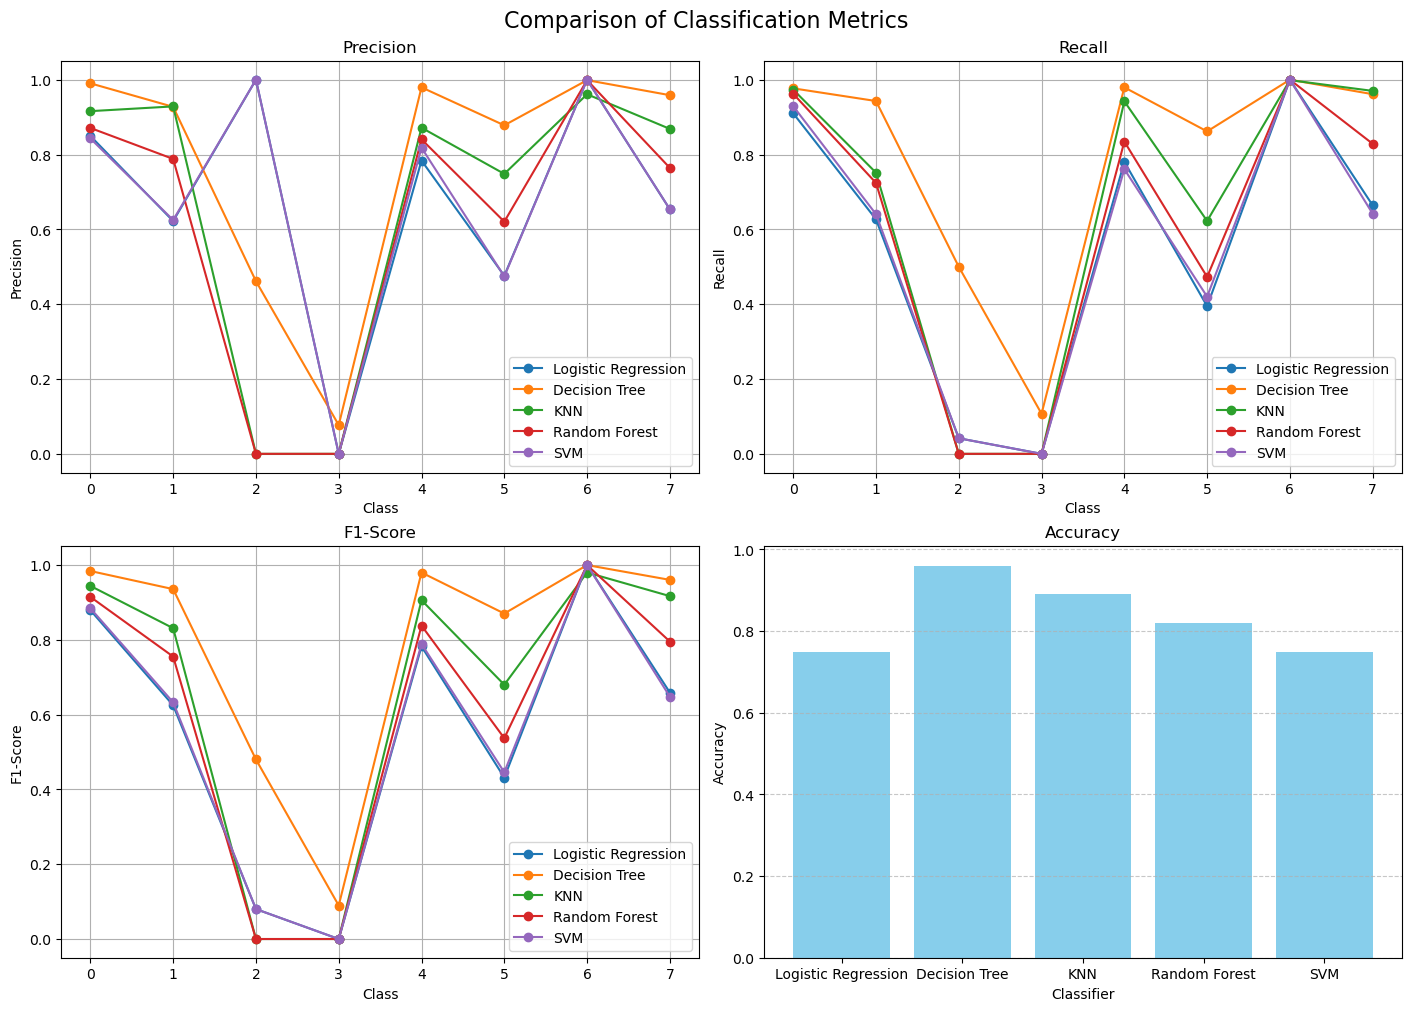

In [53]:
import matplotlib.pyplot as plt
import numpy as np

def plot_classification_reports(reports_dict):
    classes = [str(i) for i in range(15)]  # Assuming class labels are 0 to 14
    
    # Prepare data for plotting
    metrics = ['precision', 'recall', 'f1-score']
    
    # Initialize dictionaries to hold metric values for each classifier
    metrics_data = {metric: {classifier: [] for classifier in reports_dict.keys()} for metric in metrics}

    # Populate metric values
    for classifier, report in reports_dict.items():
        for metric in metrics:
            metrics_data[metric][classifier] = [report[str(cls)][metric] if str(cls) in report else np.nan for cls in range(15)]

    # Plot each metric
    fig, axs = plt.subplots(2, 2, figsize=(14, 10), constrained_layout=True)
    fig.suptitle('Comparison of Classification Metrics', fontsize=16)

    # Plot Precision
    for classifier in reports_dict.keys():
        axs[0, 0].plot(classes, metrics_data['precision'][classifier], marker='o', linestyle='-', label=classifier)
    axs[0, 0].set_title('Precision')
    axs[0, 0].set_xlabel('Class')
    axs[0, 0].set_ylabel('Precision')
    axs[0, 0].legend()
    axs[0, 0].grid(True)

    # Plot Recall
    for classifier in reports_dict.keys():
        axs[0, 1].plot(classes, metrics_data['recall'][classifier], marker='o', linestyle='-', label=classifier)
    axs[0, 1].set_title('Recall')
    axs[0, 1].set_xlabel('Class')
    axs[0, 1].set_ylabel('Recall')
    axs[0, 1].legend()
    axs[0, 1].grid(True)

    # Plot F1-Score
    for classifier in reports_dict.keys():
        axs[1, 0].plot(classes, metrics_data['f1-score'][classifier], marker='o', linestyle='-', label=classifier)
    axs[1, 0].set_title('F1-Score')
    axs[1, 0].set_xlabel('Class')
    axs[1, 0].set_ylabel('F1-Score')
    axs[1, 0].legend()
    axs[1, 0].grid(True)

    # Plot Accuracy as a bar graph
    accuracy_dict = {
        'Logistic Regression': 0.75,
        'Decision Tree': 0.96,
        'KNN': 0.89,
        'Random Forest': 0.82,
        'SVM': 0.75
    }
    
    classifiers = list(accuracy_dict.keys())
    accuracies = [accuracy_dict[classifier] for classifier in classifiers]
    
    axs[1, 1].bar(classifiers, accuracies, color='skyblue')
    axs[1, 1].set_title('Accuracy')
    axs[1, 1].set_xlabel('Classifier')
    axs[1, 1].set_ylabel('Accuracy')
    axs[1, 1].grid(axis='y', linestyle='--', alpha=0.7)

    plt.show()

# Example usage with your reports
from sklearn.metrics import classification_report

log_report = classification_report(y_test, log_pred, output_dict=True)
dtc_report = classification_report(y_test, dtc_predict, output_dict=True)
knn_report = classification_report(y_test, y_knn, output_dict=True)
rf_report = classification_report(y_test, Rf_pred, output_dict=True)
svm_report = classification_report(y_test, svmy_pred, output_dict=True)

reports_dict = {
    'Logistic Regression': log_report,
    'Decision Tree': dtc_report,
    'KNN': knn_report,
    'Random Forest': rf_report,
    'SVM': svm_report
}

# Plot the classification report comparisons
plot_classification_reports(reports_dict)
